### IMPORTAÇÃO DAS BIBLIOTECAS/MÓDULOS

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import Recall
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from pycaret.datasets import get_data
import matplotlib.pyplot as plt

### ESCOLHA E TRTAMENTO DO DATASET (O DATASET IRIS JÁ VEM PREVIAMENTE TRATADO)

In [2]:
df = get_data('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### PRÉ-PROCESSAMENTO E DIVISÃO DOS DADOS EM TREINO E TESTE

In [3]:
escala = MinMaxScaler()
onehot = OneHotEncoder(sparse=False)

X = escala.fit_transform(df.select_dtypes(exclude='object'))
y = onehot.fit_transform(df.select_dtypes(include='object'))

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


### CRIAÇÃO E TREINAMENTO DA REDE NEURAL

In [4]:
rna = Sequential()

rna.add(Dense(units=X_train.shape[1], activation='relu', input_dim=X_train.shape[1]))
rna.add(Dense(units=X_train.shape[1], activation='relu'))
rna.add(Dense(units=X_train.shape[1], activation='relu'))
rna.add(Dense(units=X_train.shape[1], activation='relu'))
rna.add(Dense(units=3, activation='softmax'))

rna.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])
resultado = rna.fit(X_train,y_train,epochs=250,batch_size=10,validation_data=(X_test,y_test))

Epoch 1/250
12/12 [==============================] - 1s 17ms/step - loss: 1.0950 - accuracy: 0.4083 - recall: 0.0000e+00 - val_loss: 1.0904 - val_accuracy: 0.6000 - val_recall: 0.0000e+00
Epoch 2/250
12/12 [==============================] - 0s 3ms/step - loss: 1.0878 - accuracy: 0.5917 - recall: 0.0000e+00 - val_loss: 1.0833 - val_accuracy: 0.5333 - val_recall: 0.0000e+00
Epoch 3/250
12/12 [==============================] - 0s 3ms/step - loss: 1.0811 - accuracy: 0.4833 - recall: 0.0000e+00 - val_loss: 1.0758 - val_accuracy: 0.3667 - val_recall: 0.0000e+00
Epoch 4/250
12/12 [==============================] - 0s 3ms/step - loss: 1.0751 - accuracy: 0.3250 - recall: 0.0000e+00 - val_loss: 1.0677 - val_accuracy: 0.3667 - val_recall: 0.0000e+00
Epoch 5/250
12/12 [==============================] - 0s 3ms/step - loss: 1.0681 - accuracy: 0.3250 - recall: 0.0000e+00 - val_loss: 1.0586 - val_accuracy: 0.3667 - val_recall: 0.0000e+00
Epoch 6/250
12/12 [==============================] - 0s 3ms/step

### AVALIAÇÃO DO MODELO COM VISUALIZAÇÃO DE DADOS

1/1 [==============================] - 0s 15ms/step


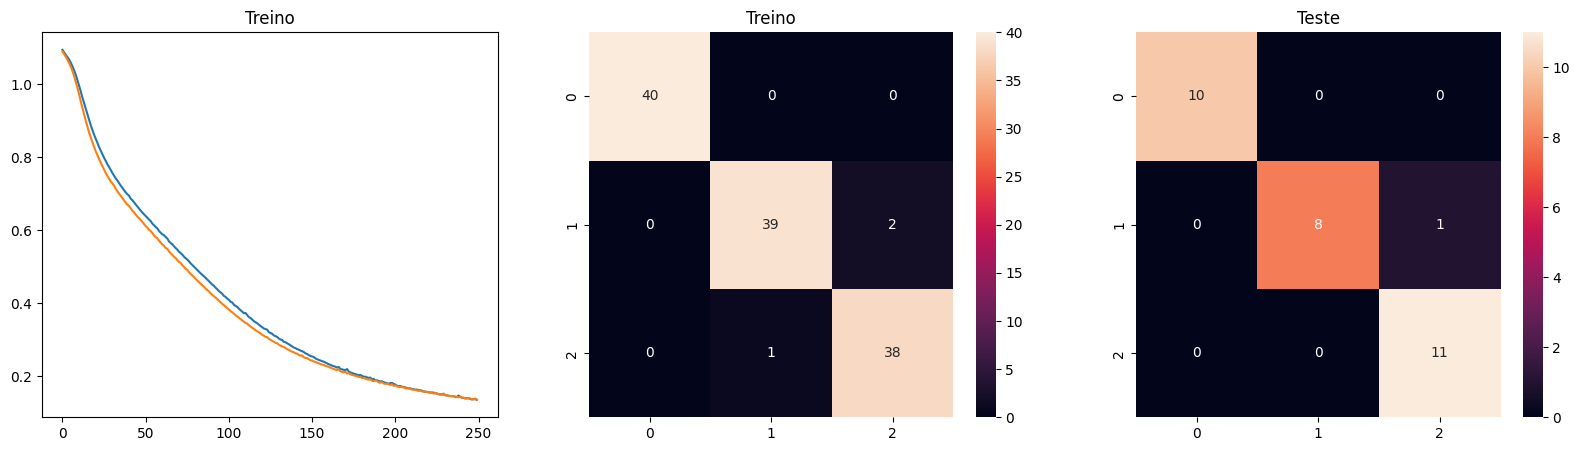

1/1 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [5]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Treino')
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

plt.subplot(1,3,2)
plt.title('Treino')
sns.heatmap(confusion_matrix(np.argmax(y_train,axis=1),np.argmax(rna.predict(X_train),axis=1)),annot=True, fmt='.0f')

plt.subplot(1,3,3)
plt.title('Teste')
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(rna.predict(X_test),axis=1)),annot=True, fmt='.0f')

plt.show()

print(classification_report(np.argmax(y_test,axis=1),np.argmax(rna.predict(X_test),axis=1)))

### AVALIAÇÃO DO MODELO COM VISUALIZAÇÃO DE DADOS NO DATAFRAME/DATASET

In [6]:
dftrain,dftest = train_test_split(df, test_size=0.20,random_state=42)

dftest['Species_Num'] = np.argmax(onehot.transform(dftest['species'].to_frame()),axis=1)
dftest['Predito'] = np.argmax(rna.predict(X_test),axis=1)

dftest

1/1 [==============================] - 0s 14ms/step


,sepal_length,sepal_width,petal_length,petal_width,species,Species_Num,Predito
73,6.1,2.8,4.7,1.2,Iris-versicolor,1,1
18,5.7,3.8,1.7,0.3,Iris-setosa,0,0
118,7.7,2.6,6.9,2.3,Iris-virginica,2,2
78,6.0,2.9,4.5,1.5,Iris-versicolor,1,1
76,6.8,2.8,4.8,1.4,Iris-versicolor,1,1
31,5.4,3.4,1.5,0.4,Iris-setosa,0,0
64,5.6,2.9,3.6,1.3,Iris-versicolor,1,1
141,6.9,3.1,5.1,2.3,Iris-virginica,2,2
68,6.2,2.2,4.5,1.5,Iris-versicolor,1,2
82,5.8,2.7,3.9,1.2,Iris-versicolor,1,1
